# Part 1: Data Preprocessing

In [1]:
# Import usual suspects
import numpy as np
import pandas as pd

In [2]:
# Importing  the training set
pd_training_set = pd.read_csv('Google_Stock_Price_Train.csv')
pd_training_set.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [3]:
# NOw let's take only open price of stock
# if we choose pd_training_set.iloc[:,1].values It will be only 1 dim numpy array
# however, we need 2 dimension numpy array
training_set_val = pd_training_set.iloc[:,1:2].values
print (type(training_set_val))
print (training_set_val.ndim)
print (training_set_val.shape)
print (training_set_val)

<class 'numpy.ndarray'>
2
(1258, 1)
[[ 325.25]
 [ 331.27]
 [ 329.83]
 ..., 
 [ 793.7 ]
 [ 783.33]
 [ 782.75]]


In [4]:
# Now, let's do normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

training_set = sc.fit_transform(training_set_val)
print (training_set)

[[ 0.08581368]
 [ 0.09701243]
 [ 0.09433366]
 ..., 
 [ 0.95725128]
 [ 0.93796041]
 [ 0.93688146]]


In [5]:
# setting X_train and y_train
X_train = training_set[0:1257]
print (X_train)

[[ 0.08581368]
 [ 0.09701243]
 [ 0.09433366]
 ..., 
 [ 0.95163331]
 [ 0.95725128]
 [ 0.93796041]]


In [6]:
y_train = training_set[1:1258]
print (y_train)

[[ 0.09701243]
 [ 0.09433366]
 [ 0.09156187]
 ..., 
 [ 0.95725128]
 [ 0.93796041]
 [ 0.93688146]]


In [7]:
# Reshaping

# chaging from 2 to 3 dimension array, by addding time step as 3rd dimension
# corresponds to (batch_size, timesteps, input_dim)
X_train = np.reshape(X_train,(1257,1,1))
print (X_train)

[[[ 0.08581368]]

 [[ 0.09701243]]

 [[ 0.09433366]]

 ..., 
 [[ 0.95163331]]

 [[ 0.95725128]]

 [[ 0.93796041]]]


In [8]:
# y_train = np.reshape(y_train)
# print (y_train)

# Part 2: Initializing the RNN

In [9]:
# importing the Keras liabraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [10]:
# Create a regressor bassed upon sequential RNN
regressor = Sequential()
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))
regressor.add(Dense(units=1))

In [11]:
# Now, let' compile our RNN regressor
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
regressor.fit(X_train ,y_train, batch_size=32, epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s - loss: 0.7001     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.5670     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.4608     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.3762     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.3085     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.2549     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.2127     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.1795     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.1535     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.1333     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.1179     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.1063     
Epoch 13/200
1257/1257 [=============

1257/1257 [==============================] - 0s - loss: 3.6637e-04     
Epoch 102/200
1257/1257 [==============================] - 0s - loss: 3.4320e-04     
Epoch 103/200
1257/1257 [==============================] - 0s - loss: 3.2585e-04     
Epoch 104/200
1257/1257 [==============================] - 0s - loss: 3.1135e-04     
Epoch 105/200
1257/1257 [==============================] - 0s - loss: 3.0104e-04     
Epoch 106/200
1257/1257 [==============================] - 0s - loss: 2.9300e-04     
Epoch 107/200
1257/1257 [==============================] - 0s - loss: 2.8752e-04     
Epoch 108/200
1257/1257 [==============================] - 0s - loss: 2.8239e-04     
Epoch 109/200
1257/1257 [==============================] - 0s - loss: 2.7885e-04     
Epoch 110/200
1257/1257 [==============================] - 0s - loss: 2.7669e-04     
Epoch 111/200
1257/1257 [==============================] - 0s - loss: 2.7403e-04     
Epoch 112/200
1257/1257 [==============================] - 0s - loss

1257/1257 [==============================] - 0s - loss: 2.5113e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.5210e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.5321e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.5205e-04     
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.5193e-04     


# Part 3: Making Prediction

In [13]:
# Preprocessing for Test_set
# Importing the test set
pd_testing_set = pd.read_csv('Google_Stock_Price_Test.csv')
pd_testing_set.tail()

,Date,Open,High,Low,Close,Volume
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"
20,2/1/2017,799.68,801.19,791.19,795.70,"2,029,700"


In [14]:
# NOw let's take only open price of stock
# if we choose pd_training_set.iloc[:,1] It will be only 1 dim pandas series
# however, we need 2 dimension, so
real_stock_price = pd_testing_set.iloc[:,1:2]
print (type(real_stock_price))
print (real_stock_price.ndim)
print (real_stock_price.shape)
print (real_stock_price)

<class 'pandas.core.frame.DataFrame'>
2
(21, 1)
      Open
0   778.81
1   788.36
2   786.08
3   795.26
4   806.40
5   807.86
6   805.00
7   807.14
8   807.48
9   807.08
10  805.81
11  805.12
12  806.91
13  807.25
14  822.30
15  829.62
16  837.81
17  834.71
18  814.66
19  796.86
20  799.68


In [15]:
testing_set = sc.fit_transform(real_stock_price)
print (testing_set)
# in the end inverse fit transform to get normal stock open price back

[[ 0.        ]
 [ 0.16186441]
 [ 0.12322034]
 [ 0.27881356]
 [ 0.46762712]
 [ 0.49237288]
 [ 0.44389831]
 [ 0.48016949]
 [ 0.4859322 ]
 [ 0.47915254]
 [ 0.45762712]
 [ 0.4459322 ]
 [ 0.47627119]
 [ 0.4820339 ]
 [ 0.73711864]
 [ 0.86118644]
 [ 1.        ]
 [ 0.94745763]
 [ 0.60762712]
 [ 0.3059322 ]
 [ 0.35372881]]


In [16]:
# same for X_test
X_test = testing_set[0:20]
print (X_test)
print (type(X_test))
print (X_test.ndim)
print (X_test.shape)
print (X_test)

[[ 0.        ]
 [ 0.16186441]
 [ 0.12322034]
 [ 0.27881356]
 [ 0.46762712]
 [ 0.49237288]
 [ 0.44389831]
 [ 0.48016949]
 [ 0.4859322 ]
 [ 0.47915254]
 [ 0.45762712]
 [ 0.4459322 ]
 [ 0.47627119]
 [ 0.4820339 ]
 [ 0.73711864]
 [ 0.86118644]
 [ 1.        ]
 [ 0.94745763]
 [ 0.60762712]
 [ 0.3059322 ]]
<class 'numpy.ndarray'>
2
(20, 1)
[[ 0.        ]
 [ 0.16186441]
 [ 0.12322034]
 [ 0.27881356]
 [ 0.46762712]
 [ 0.49237288]
 [ 0.44389831]
 [ 0.48016949]
 [ 0.4859322 ]
 [ 0.47915254]
 [ 0.45762712]
 [ 0.4459322 ]
 [ 0.47627119]
 [ 0.4820339 ]
 [ 0.73711864]
 [ 0.86118644]
 [ 1.        ]
 [ 0.94745763]
 [ 0.60762712]
 [ 0.3059322 ]]


In [17]:
# Reshaping

# chaging from 2 to 3 dimension array, by addding time step as 3rd dimension
# corresponds to (batch_size, timesteps, input_dim)
test_inputs = np.reshape(X_test,(20,1,1))
print (test_inputs)
print (type(test_inputs))
print (test_inputs.ndim)
print (test_inputs.shape)
print (test_inputs)

[[[ 0.        ]]

 [[ 0.16186441]]

 [[ 0.12322034]]

 [[ 0.27881356]]

 [[ 0.46762712]]

 [[ 0.49237288]]

 [[ 0.44389831]]

 [[ 0.48016949]]

 [[ 0.4859322 ]]

 [[ 0.47915254]]

 [[ 0.45762712]]

 [[ 0.4459322 ]]

 [[ 0.47627119]]

 [[ 0.4820339 ]]

 [[ 0.73711864]]

 [[ 0.86118644]]

 [[ 1.        ]]

 [[ 0.94745763]]

 [[ 0.60762712]]

 [[ 0.3059322 ]]]
<class 'numpy.ndarray'>
3
(20, 1, 1)
[[[ 0.        ]]

 [[ 0.16186441]]

 [[ 0.12322034]]

 [[ 0.27881356]]

 [[ 0.46762712]]

 [[ 0.49237288]]

 [[ 0.44389831]]

 [[ 0.48016949]]

 [[ 0.4859322 ]]

 [[ 0.47915254]]

 [[ 0.45762712]]

 [[ 0.4459322 ]]

 [[ 0.47627119]]

 [[ 0.4820339 ]]

 [[ 0.73711864]]

 [[ 0.86118644]]

 [[ 1.        ]]

 [[ 0.94745763]]

 [[ 0.60762712]]

 [[ 0.3059322 ]]]


In [18]:
# Now, let's predict
y_test = regressor.predict(test_inputs)

# inverse scaled values to get real stock price
predicted_stock_price = sc.inverse_transform(y_test)
print (predicted_stock_price)

[[ 779.16113281]
 [ 788.31689453]
 [ 786.10021973]
 [ 795.13104248]
 [ 806.38348389]
 [ 807.8727417 ]
 [ 804.9576416 ]
 [ 807.13800049]
 [ 807.48492432]
 [ 807.07684326]
 [ 805.7822876 ]
 [ 805.07977295]
 [ 806.90344238]
 [ 807.25030518]
 [ 822.65966797]
 [ 829.68115234]
 [ 836.31219482]
 [ 834.29217529]
 [ 814.83007812]
 [ 796.73114014]]


In [19]:
# Part 4: Let's Visualize the results

import matplotlib.pyplot as plt
%matplotlib inline

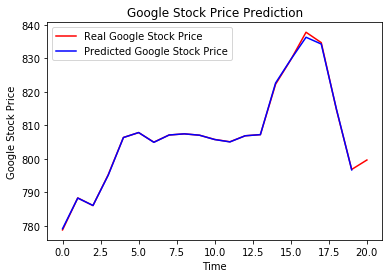

In [20]:
plt.plot(real_stock_price, color='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [32]:
real_stock_price_df = pd.DataFrame(real_stock_price)
print (type(real_stock_price_df))
real_stock_price_df.head()

<class 'pandas.core.frame.DataFrame'>


,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [31]:
predicted_stock_df = pd.DataFrame(predicted_stock_price, columns=['Predicted_Open'])
print (type(predicted_stock_df))
predicted_stock_df.head()

<class 'pandas.core.frame.DataFrame'>


,Predicted_Open
0,779.161133
1,788.316895
2,786.100220
3,795.131042
4,806.383484


In [41]:
print (pd_testing_set.iloc[:,1])

0     778.81
1     788.36
2     786.08
3     795.26
4     806.40
5     807.86
6     805.00
7     807.14
8     807.48
9     807.08
10    805.81
11    805.12
12    806.91
13    807.25
14    822.30
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
20    799.68
Name: Open, dtype: float64


In [42]:
comparsion_sheet = pd.DataFrame([pd_testing_set.iloc[:,1].values,predicted_stock_price], columns=['Real_Open_Price','Predicted_Open_Price'])
comparsion_sheet.head()

AssertionError: 2 columns passed, passed data had 21 columns